# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS


- To submit your assignment follow the instructions given in Canvas.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun the notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients of polynomial degree 5" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

<hr style="height:2pt">

In [2]:
# RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Question 7 optional imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

<a id="contents"></a>

## Notebook Contents

- [**PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com**](#part1)
  - [Part 1 Overview](#part1intro)
  - [Question 1: Exploratory data analysis (EDA) [10 pts]](#part1questions)
  - [Question 2: k-Nearest Neighbors [25 pts]](#part2questions)
  - [Question 3: Simple linear regression [25 pts]](#part3questions)
  - [Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]](#part4questions)


- [**PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com**](#part2)
  - [Part 2 Overview](#part2intro)
  - [Question 5:   Investigating relationships of SimplyMarry.com reported attributes [25 pts]](#part5questions)
  - [Question 6:  Calculate the Gini coefficient [15 pts]](#part6questions)
  - [Question 7 (required for 209a students, optional for others):  Multi-linear regression [10 pts]](#part7questions)


## About this homework

This assignment is the first where we will go through the process of loading a dataset, splitting it in train and test sets, pre-processing it, and finally running models and evaluating our results.

We have two different datasets, one with car data in [**PART 1**](#part1) and another with data from an Indian matrimonial web site in [**PART 2**](#part2). Using these datasets, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method.

**PLEASE NOTE:** [Question 4](#part4questions) and [Question 7](#part7questions) are **required for 209a students** and are **optional for 109a students**. 109a students are welcome to complete Q4 and Q7, if time permits, for your own learning experience. However, neither Q4 nor Q7 will be graded for 109a students and neither will not count toward your grade. On the otherhand, 209a students MUST complete Q4 and Q7, and both questions will be graded.

<a id="part1"></a>
    
# PART 1 [60 pts]: Predicting the selling price of cars on CarDekho.com

[Return to contents](#contents)

<a id="part1intro"></a>

## Overview

[Return to contents](#contents)

According to its website, **CarDekho.com** is India's leading car search venture. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons, as well as videos and pictures of all car brands and models available in India. Each car has a **current selling price**, which is the price for buying a used car on this site, and an **MRP**, which is the retail price of the car. These two prices differ depending on factors such as brand, make year, mileage, condition, etc.  

### Dataset 

The dataset contains 601 used cars and is available as `data/car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a used car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of the car when it was new (in lakhs). 
- **Kms_Driven** - number of kilometers

**NOTE:** 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

### Objective

Using kNN and linear regression we will predict the `Current_Selling_Price` from the other features available in this dataset.

<a id="part1questions"></a>

## <div class='exercise'><b> Question 1: Exploratory data analysis (EDA) [10 pts]</b></div>

[Return to contents](#contents)

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**

**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of kilometers that the cars have been driven?

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

## Question 1: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

**Load the dataset, inspect it, and answer the following questions:**
    
**1.1** Identify all variables in the dataset. Which ones are quantitative, and which ones are categorical? If you think any variables are categorical, briefly explain why.

</div>

In [3]:
# your code here

# Read dataframe from csv file
df = pd.read_csv("data/car_dekho_full.csv")

# Inspect dataframe
print("Basic information about our CarDekho.com dataset:\n")
print(df.info())
print(
    "\n\nA little more summary info about our data "
    "(there\nare only a few columns in our data, making "
    "this\neasy to inspect):\n\n",
    df.describe(),
)
print("\n\nAnd, the first few rows of our data:")
display(df.head())

Basic information about our CarDekho.com dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   601 non-null    int64  
 1   Current_Selling_Price  601 non-null    float64
 2   MRP                    601 non-null    float64
 3   Kms_Driven             601 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 18.9 KB
None


A little more summary info about our data (there
are only a few columns in our data, making this
easy to inspect):

            Year  Current_Selling_Price      MRP  Kms_Driven
count   601.000                601.000  601.000     601.000
mean   2013.887                  4.393    6.912   33718.745
std       2.721                  4.518    6.480   26846.657
min    2003.000                  0.120    0.320     500.000
25%    2012.000                  1.050    1.470   15000.00

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


**INTERPRETATION:**

*Your answer here*

- `Current_Selling_Price` is a continuous quantitative variable that represents the current market price of the vehicle. 
- `MRP` is a continuous quantitative variable that represents the price of the vehicle when it was new. 
- `Kms_Driven` is a continuous quantitative variable that represents the number of kilometers that have been driven on the vehicle. 
- `Year` can be a little more tricky to determine whether to treat it as a quantitative or categorical variable, and this may vary under different circumstances. In this dataset, for the ways in which we are using it here, **`Year` should be considered to be a discrete quantitative variable.**
  - For instance, the ordering of `Year` is important, particularly when considering (or predicting) the current selling price of a car. Depreciation typically leads to the decreasing value of a vehicle as it ages. In addition, `Year` is likely to have a discernable relationship to other attributes of a car wherein other values change on average as the age of the car increases (i.e. we would expect kilometers driven to increase and would also probably expect MRP to be lower).
  - On the other hand, it is easy to imagine cirsumstances and applications where it will really matter that there is no guarantee that a 2008 Chevy Impala is equally similar to a 2007 Chevy Impala or 2009 Chevy Impala (for instance, some model years just comprise small cosmetic changes or marginal upgrades, while others involve a complete redesign of the vehicle all the way down to the chassis). In that sense, there are circumstances under which you might want to explicitly treat `Year` as a categorical variable. However, this would be very context dependent, and you would likely want to have a very strong reason for doing so.

<div class='exercise-r'>  

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

</div>

In [4]:
# Be certain to name your variables mean_csp, mean_mrp, std_csp, std_mrp
# to match the variable names used in the provided print function

# your code here

mean_csp = df["Current_Selling_Price"].mean()
mean_mrp = df["MRP"].mean()
std_csp = df["Current_Selling_Price"].std()
std_mrp = df["MRP"].std()

# end your code here 

print(
    "\n"
    f"The mean Current Selling Price is {mean_csp:.4f} lakhs\n"
    f"The mean MRP is {mean_mrp:.4f} lakhs\n"
    f"The Standard Deviation of Current Selling Price is {std_csp:.4f}\n"
    f"The Standard Deviation of MRP is {std_mrp:.4f}"
)


The mean Current Selling Price is 4.3931 lakhs
The mean MRP is 6.9116 lakhs
The Standard Deviation of Current Selling Price is 4.5183
The Standard Deviation of MRP is 6.4801


<div class='exercise-r'>  

**1.3** What is the range of kilometers that the cars have been driven?

</div>

In [5]:
# your code here

km_min = df["Kms_Driven"].min()
km_max = df["Kms_Driven"].max()

print(
    f"The range of kilometers for which cars in our dataset "
    f"have been driven is {km_max - km_min:,.0f} kms.\n\n"
    f"The maximum number of kilometers is {km_max:,.0f}, "
    f"and the minimum is {km_min:,.0f}."
)


The range of kilometers for which cars in our dataset have been driven is 212,500 kms.

The maximum number of kilometers is 213,000, and the minimum is 500.


<div class='exercise-r'>  

**1.4** The goal of this part is to identify the best variable from which to predict our response variable `Current_Selling_Price`. 

- Plot a scatter plot between each predictor and our reponse variable and examine the relationship between the predictors and `Current_Selling_Price`.
- Based on the plots, which is the predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
**PLEASE NOTE:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals which clearly communicate the data (as described in the [Instructions](#instructions) at the start of this notebook). Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

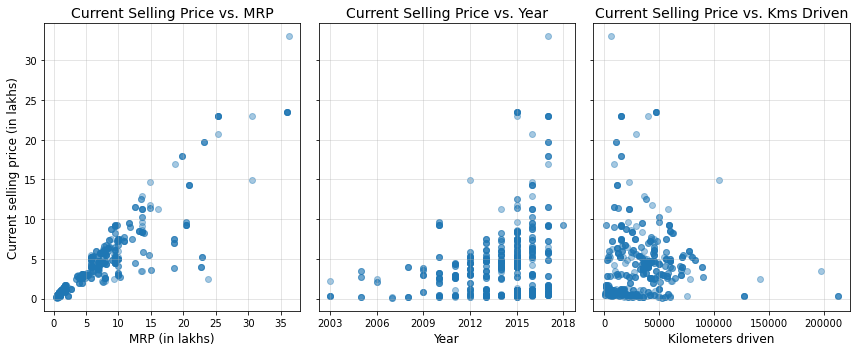

In [6]:
# your code here

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

fontsize = 14

cols = ["MRP", "Year", "Kms_Driven"] 
title_vs_text = ["MRP", "Year", "Kms Driven"]
xlabels = ["MRP (in lakhs)", "Year", "Kilometers driven"]

for i, (ax, col, title_vs, xlabel) in enumerate(
    zip(axes, cols, title_vs_text, xlabels)
):

    ax.scatter(df[col], df["Current_Selling_Price"], alpha=0.4)
    ax.set_title(
        f"Current Selling Price vs. {title_vs}",
        fontsize=fontsize,
    )
    ax.set_xlabel(xlabel, fontsize=fontsize-2)
    ax.set_ylabel(
        "Current selling price (in lakhs)" if i==0 else None, 
        fontsize=fontsize-2
    )
    ax.grid(":", alpha=0.4)
    
    if col=="Year":
        min_year = df[col].min()
        max_year = df[col].max()
        ax.set_xticks(np.arange(min_year, max_year+1, 3))

plt.tight_layout()
plt.show()

**INTERPRETATION:**

*Your answer here*

There appears to be a positive and somewhat linear relationship between MRP and Current Selling Price. There is a pattern in the plot of Year and Current Selling Price, where we can see that the Current Selling Price, on average, increases with Year. And, for Kilometers Driven, we can see an overall decreasing trend in its relationship with Current Selling Price. However, Kilometers Driven does appear to be the weakest relationship among all of our potential predictors.

Based on the graphs, MRP seems to be the best predictor for predicting `Current_Selling_Price`. It exhibits a strong positive relationship.

<a id="part2questions"></a>

## <div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b></div>

[Return to contents](#contents)

We begin our modeling with k-Nearest Neighbors (kNN) regression. For this, we will use `sklearn`'s built-in functions.

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.

- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 
- **2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)
- **2.2.3** Find the best model based on the test $MSE$ values.
- **2.2.4** Evaluate and report the $R^2$ of the best model.


**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

- **2.3.1** How does the value of $k$ affect the fitted model?
- **2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?  
- **2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
- **2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

## Question 2: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**2.1** Split the dataset into a train and test set with 75% training data and 25% testing data, using argument `random_state = 109`.

</div>

In [7]:
# your code here

# Save x and y values to separate arrays prior to splitting
y = df['Current_Selling_Price'].values

# Also, reshape x array to 2D so that it works with sklearn models
X = df['MRP'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=109
)

<div class='exercise-r'>  

**2.2** Now, we will fit several kNN regression models for various values of $k$ to identify the best parameterization for our model.
    
- **2.2.1** For each $k$ in $k \in [1,2,3,5,7,10,50,100]$, fit a k-NN regression model to the training data with response `Current_Selling_Price` and the predictor chosen in Question 1.4. 
  - For each $k$, make a plot of reponse vs. predictor (8 plots in total, arranged in a 4×2 grid). 
  - Each plot of your 8 plots should clearly show (a) the training data and the testing data in different colors, (b) the model prediction, and (c) title, legend, and axis labels.
  - **NOTE:** Feel free to use the `plt.subplots()` code we provide to specify your 4x2 grid, unless you first try that and decide that you have a clearer, cleaner way of accomplishing this task. 

</div>

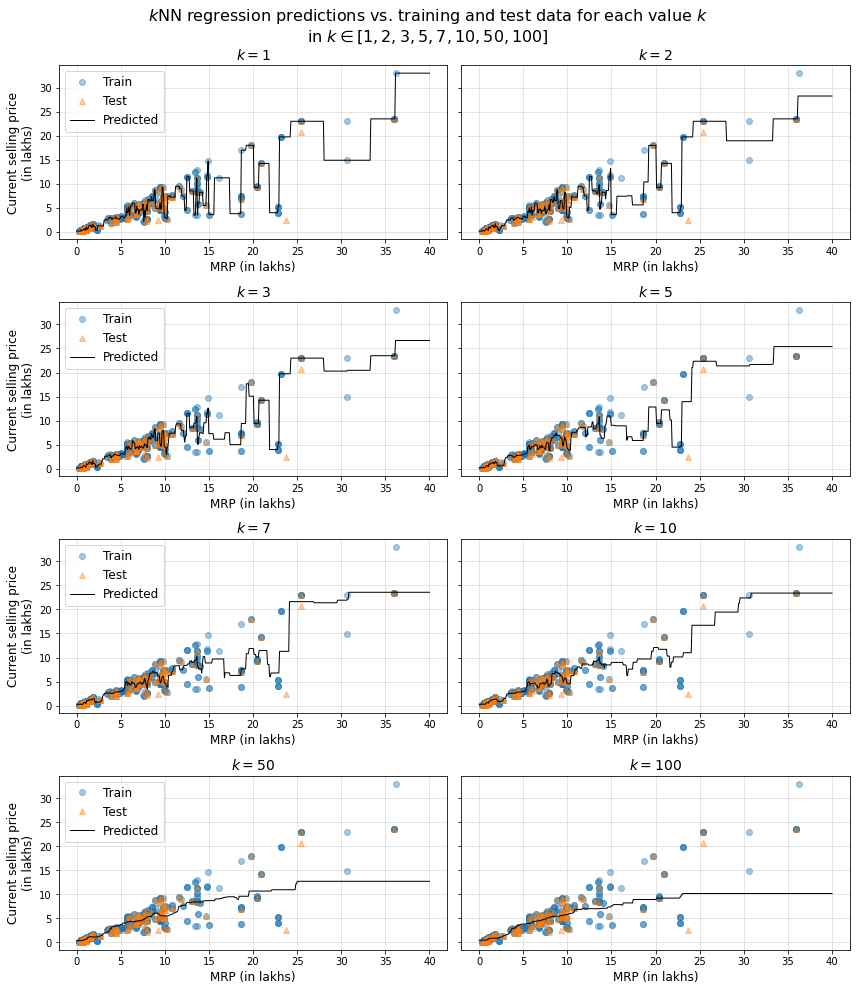

In [8]:
# fig, axs = plt.subplots(4,2, figsize=(12, 14))
# fig.subplots_adjust(hspace = .5, wspace=.3)

# your code here

# Generate our subplots axes
fig, axs = plt.subplots(4,2, sharey=True, figsize=(12, 14))

# Define our list of k values
K = [1,2,3,5,7,10,50,100]

# Set the base fontsize for our plotting code below
fontsize = 14

# Create our empty lists for storing MSE values
mse_train = []
mse_test = []

# Title our overall set of subplots
plt.suptitle(
    "$k$NN regression predictions vs. training and test data for each "
    "value $k$\nin $k \in {}$".format(K),
    fontsize=fontsize+2
)

# Flatten our axes object to make it easier to work with in our loop
axs = axs.ravel()

# Loop over the k-values
for i, k in enumerate(K):

    # Instantiate and fit a kNN regressor class object
    knn_model = KNeighborsRegressor(n_neighbors=k) 
    knn_model.fit(X_train, y_train) 

    # Predict on training data with our fitted kNN class object
    predicted_price_train = knn_model.predict(X_train)

    # Predict on test data with our fitted kNN class object
    predicted_price_test = knn_model.predict(X_test) 
    Xline = np.linspace(0, 40, 500).reshape(-1, 1)

    # Evaluate and append the MSE for our training data
    mse_train.append( mean_squared_error(y_train, predicted_price_train)) 

    # Evaluate and append the MSE for our test data
    mse_test.append( mean_squared_error(y_test, predicted_price_test)) 
    
    # Plot our training and test data
    axs[i].plot(X_train, y_train, "o", alpha=0.4, label="Train")
    axs[i].plot(X_test, y_test, "^", alpha=0.4, label="Test")
    
    # Plot our knn regression curve
    axs[i].plot(
        Xline,
        knn_model.predict(Xline),
        label="Predicted",
        color="black",
        linewidth=1
    )
    
    # Set labels add legends, and add gridlines for easier interpretation
    axs[i].set_title("$k = " + str(k) + "$", fontsize=fontsize)
    axs[i].set_xlabel("MRP (in lakhs)", fontsize=fontsize-2)
    
    if i%2==0:
        axs[i].set_ylabel(
            "Current selling price\n(in lakhs)", fontsize=fontsize-2
        )
        axs[i].legend(fontsize=fontsize-2)
    
    axs[i].grid(":", alpha=0.4)
    
plt.tight_layout()
plt.show()

**SOLUTION NOTES:** 

Please note that this is a situation where you will want to represent your regression curve as a set of predictions from a continuous and very closely-spaced array of $x$ values, as we have done above using `np.linspace(...)` (`np.arange(...)` also works extremely well for this same purpose). We would expect the true prediction curve for a $k$NN model to be represented as a step function (i.e. with only vertical and horizontal lines). 

Say for instance, that you used only your train or your test $x$ values to generate your predictions for plotting this curve. That curve would be incomplete and would be falsely represented with diagonal lines in areas where your $x$ values are widely spaced from one another. Even worse would be plotting your curves for both the train and test predictions separately here, because doing so would produce two different sets of diagonal lines for each set of predictions, not only misprepresenting the $k$NN regression curve as not being a step function, but also giving the very, very false visual impression that the $k$NN regression curve differs based on the specific $x$ values for which you are predicting.

<div class='exercise-r'>  

**2.2.2** Plot the training and test $MSE$ values as a function of $k$ (1 plot in total)

</div>

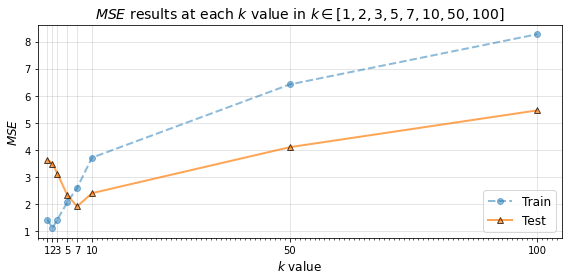

In [9]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.plot(K, mse_train, "o--", label="Train", linewidth=2, alpha=0.5)
ax.plot(
    K, mse_test, "^-", label="Test", linewidth=2, markeredgecolor="k", alpha=0.7
)
ax.set_xticks(K)
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
ax.set_xlim(-1)
ax.set_xlabel(r"$k$ value", fontsize=12)
ax.set_ylabel("$MSE$", fontsize=12)
ax.set_title(
    r"$MSE$ results at each $k$ value in $k \in {}$".format(K),
    fontsize=14
)
ax.legend(fontsize=12, loc=4)
ax.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()

**SOLUTION NOTES:**

Please note that this plot will be extremely difficult to interpret if EITHER markers are not used to clearly mark the location of each value $k$ on your $MSE$ lines, OR labeled tick-marks are not placed on the $x$-axis corresponding to each specific value $k$. In most cases, EITHER ONE of those steps should be sufficient here for identifying where each fitted $k$ is located along your plotted $MSE$ lines. We have just chosen to take BOTH steps in the solution plot above to provide the utmost clarity for the viewer. However, if NEITHER of those steps are taken, it becomes extremely difficult (and nearly impossible with this chart) for the viewer to discern where the actual $k$ values 1-10 are located along each line.

<div class='exercise-r'>  

**2.2.3** Find the best model based on the test $MSE$ values.

</div>

In [10]:
# your code here

#Find the minimum test MSE
min_mse = mse_test.index(min(mse_test))

#Find the k value associated to the lowest MSE
best_model = K[min_mse]
print(
    f"The best k value is {best_model}. This corresponds to the "
    f"lowest test MSE of {min(mse_test):.3f}."
)

The best k value is 7. This corresponds to the lowest test MSE of 1.922.


<div class='exercise-r'>  

**2.2.4** Evaluate and report the $R^2$ of the best model.

</div>

In [11]:
# your code here

# Instantiate a kNN model class object for our best k value
knn_model = KNeighborsRegressor(n_neighbors=best_model) 

# Fit the model using the fit method of our kNN model class object
knn_model.fit(X_train, y_train) 

# Predict on train using the predict method of our fitted kNN class object
predicted_price_train = knn_model.predict(X_train)

# Predict on test using the predict method
predicted_price_test = knn_model.predict(X_test) 

# Evaluate R^2 using our test predictions
r2 = r2_score(y_test, predicted_price_test)

print(
    f"The R-squared score evaluated on the test set for the best model "
    f"with k={best_model} is {r2:.4f}."
)

The R-squared score evaluated on the test set for the best model with k=7 is 0.8807.


<div class='exercise-r'>  

**2.3** Discuss your results by answering the following questions.  You should answer the questions directly in the provided markdown cells of your notebook.

**2.3.1** How does the value of $k$ affect the fitted model?

</div>

*your answer here*

The lower the value of $k$, the more closely fit the model will be to our training data. For instance, $k=1$ fits (or, more accurately "overfits") the data at every value $x$ contained in our training data. As the values of $k$ increases, the curve becomes smoother, until we reach $k=n$ for the $n$ values contained in the training data. At that point the $k$NN model with simply predict the mean observed training value $y$ at all values of $x$.


<div class='exercise-r'>  

**2.3.2** If $n$ is the number of observations in the training set, what can you say about a kNN regression model that uses $k = n$?

</div>

*your answer here*

If $k=n$, all points will receive the same predicted value. That predicted value will be equal to the mean $y$ value of our training observations.

<div class='exercise-r'>  

**2.3.3** Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

</div>

*your answer here*

Yes, the train and test plots of $MSE$ do exhibit different trends. For small values $k$, the model overfits the data. Therefore, it achieves a very good $MSE$ on the training set and a poor $MSE$ on the test data. Larger values $k$ decrease overfitting on the training data, hence the training $MSE$ increases as the $k$ value increases, while the test $MSE$ decreases until the point at which it reaches $k=7$. But too large a $k$ does not allow for sufficient variation in predictions for an accurate set test predictions, so the test $MSE$ only decreases to a point and then it begins to increase again.

<div class='exercise-r'>  

**2.3.4** Try rerunning the same code by changing the random seed during the train-test split (just be certain to return it to `random_state = 109` and then rerun it prior to moving on to Question 3). Do you always get the same answer? If not, why?

</div>

*your answer here*

No, the answer varies each time. This is attributable to the variation in train and test data due to the random split. In other words, our model fits to a different set of training data and predicts on a different set of test data with each different random state used when splitting the data. This leads to instances where our $R^2$ result changes with each split and can also lead to slight variation in our optimal value $k$ in more extreme circumstances. 

<a id="part3questions"></a>

## <div class='exercise'><b>Question 3:  Simple linear regression [25 pts]</b></div>

[Return to contents](#contents)

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

- **3.1.1** Run a linear regression model.
- **3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.
- **3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.
- **3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

**NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- **3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression? 

- **3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- **3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

## Question 3: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression. You will use the same 75% training and 25% testing split of the data, using the same `random_state = 109`.

**3.1.1** Run a linear regression model.

- **NOTE:** Use the `sklearn` module for linear regression. Instantiate a `LinearRegression` model object, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions.

</div>

In [12]:
# your code here

# Instantiate a LinearRegression class object and fit with train data
linreg = LinearRegression().fit(X_train, y_train)

# Use predict method for fitted model object to predict on train
y_train_pred = linreg.predict(X_train)

# Use predict method to predict on the test
y_test_pred = linreg.predict(X_test)

<div class='exercise-r'>  

**3.1.2** Report the slope/coefficient and intercept values for the fitted linear model.

</div>

In [13]:
# your code here

print(
    f"Coefficient/Slope of the fitted linear model\t{linreg.coef_[0]:.4f}\n"
    f"Intercept of the fitted linear model\t\t{linreg.intercept_:.4f}"
)

Coefficient/Slope of the fitted linear model	0.6157
Intercept of the fitted linear model		0.1124


<div class='exercise-r'>  

**3.1.3** Report the $MSE$ for the training and test sets and the $R^2$ for the test set.

</div>

In [14]:
# your code here 

#Compute the MSE of the model
print("Linear regression model results:\n")
print(
    "\tTrain MSE\t{:.4f}\n"
    "\tTest MSE\t{:.4f}\n".format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred),
    )
)

#Compute the R-squared of the model
r2 = r2_score(y_test, y_test_pred)
print(f"\tTest R-squared\t{r2:.4f}")

Linear regression model results:

	Train MSE	4.7133
	Test MSE	3.1362

	Test R-squared	0.8053


<div class='exercise-r'>  

**3.1.4** Plot the **residuals**, $e = y - \hat{y}$, of the model on the training set as a function of the **response** variable. Draw a horizontal line denoting the zero residual value on the $y$-axis.

</div>

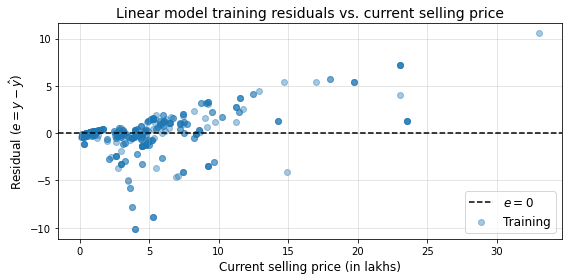

In [15]:
# your code here 

# Calculate residuals
residuals = y_train - y_train_pred

# Generate residuals plot as required
plt.figure(figsize=(8, 4))
plt.scatter(y_train, residuals, alpha=0.4, label="Training")
plt.axhline(color="black",linestyle="dashed", label="$e=0$")
plt.title(
    "Linear model training residuals vs. current selling price",
    fontsize=14,
)
plt.xlabel("Current selling price (in lakhs)", fontsize=12)
plt.ylabel("Residual ($e = y - \hat{y}$)", fontsize=12)
plt.legend(fontsize=12, loc=4)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

<div class='exercise-r'>  

**3.2** Discuss your results by answering the following questions.

**3.2.1** How does the test $MSE$ score compare with the best test $MSE$ value obtained with kNN regression?

</div>

*your answer here*

The linear regression test $MSE$ is larger than the best case test $MSE$ (i.e. $k=7$) achieved from $k$NN regression. This makes sense. $k$NN is a non-parametric method, where $k=7$ is going to be far more expressive than a simple linear model. In other words, $k$NN's regression curve can more closely fit to the overall shape of the data, whereas the linear regression curve is restricted to a straight line.

<div class='exercise-r'>  

**3.2.2** What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

</div>

*your answer here*

The positive slope implies that the MRP and the current selling price of a car are positively related. More specifically, the slope of 0.6157 tells us that, for every 1 lakh increase in MRP, on average, we can expect a 0.6157 lakh increase in current selling price.

<div class='exercise-r'>  

**3.2.3** Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.

</div>

*your answer here*

The assumption of linearity does not seem to be justified, as the residuals are not scattered randomly around $e=0$ and there is a clear trend exhibited in our residual points! This trend indicates that the model violates the assumption of homoskedasticity. More specifically, the variance of the error terms increase as the values of the response variable increases. This is evidenced by the increasing spread of our residuals as the observed current selling price increases.

<a id="part4questions"></a>

## <div class='exercise'><b>Question 4 (required for 209a students, optional for others):  Linear regression with feature engineering [10 pts]</b></div>

[Return to contents](#contents)

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage Depreciation} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

- **4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

- **4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

- **4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

- **4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed?


**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.


**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

## Question 4: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**4.1** Creating a new variable from existing data: **percentage depreciation**

Feature engineering involves transforming data into features that better represent the underlying problem for a predictive model. This typically results in improved model accuracy on unseen data. 

Our previous regression model explores the relationship between `Current_Selling_Price` (CSP) and `MRP`.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

However, this linear equation does not incorparate other interesting variables such as the year of manufacture (`Year`), or the kilometers driven (`Kms_Driven`), which may be important factors that affect the current value of the car.

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the "percentage depreciation" of the current selling price to the MRP as follows:

$$\textrm{Percentage Depreciation} = perc =\frac{MRP - CSP}{MRP}$$
    
Create a new column in your dataframe with each car's `perc` value.

</div>

In [16]:
# your code here

#Creating a new column perc
df["perc"] = (df["MRP"] - df["Current_Selling_Price"])/df["MRP"]

print("Summary values for the new percentage depreciation ('perc') column:\n")
print(df["perc"].describe())

print("\nThe first few observations in our data with 'perc' added:")
df.head()

Summary values for the new percentage depreciation ('perc') column:

count    601.000
mean       0.345
std        0.193
min        0.011
25%        0.200
50%        0.330
75%        0.470
max        0.895
Name: perc, dtype: float64

The first few observations in our data with 'perc' added:


,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649


<div class='exercise-r'>  

**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs and including the required interpretation:

**4.2.1** It was seen previously that there is a relationship between `Year` and `Current_Selling_Price`. Is the relationship between `Year` and `perc` the same. If not, how has it changed and why do you think so?

</div>

In [17]:
# your code here

# Define a convenient plotting function to reuse in all parts of 4.2

def perc_comparison_plot(df, x_colname, y_colnames, x_label, y_labels):
    """
    Generates side-by-side scatterplots plots to compare different y 
    variables against the same x variable
    
    :param df: pd.DataFrame, contains data for plottig
    :param x_colname: str, name of x column in df
    :param y_colnames: list, a list of 2 column names for both y variables
    :param x_label: str, x variable name as it should appear in title/axis
    :param y_labels: list, y variable names as they should appear in title/axis
    """
    
    fig, axes = plt.subplots(1, 2, sharey=False, figsize=(11.5, 4))

    fontsize = 14

    for i, (ax, col, y_label) in enumerate(
        zip(axes, y_colnames, y_labels)
    ):

        ax.scatter(df[x_colname], df[col], alpha=0.4)
        ax.set_title(
            f"{y_label} vs. {x_label}",
            fontsize=fontsize,
        )
        ax.set_xlabel(x_label, fontsize=fontsize-2)
        ax.set_ylabel(y_label, fontsize=fontsize-2)
        ax.grid(":", alpha=0.4)
        
        if x_colname=="Year":
            min_year = df[x_colname].min()
            max_year = df[x_colname].max()
            ax.set_xticks(np.arange(min_year, max_year+1, 3))

    plt.tight_layout()
    plt.show()

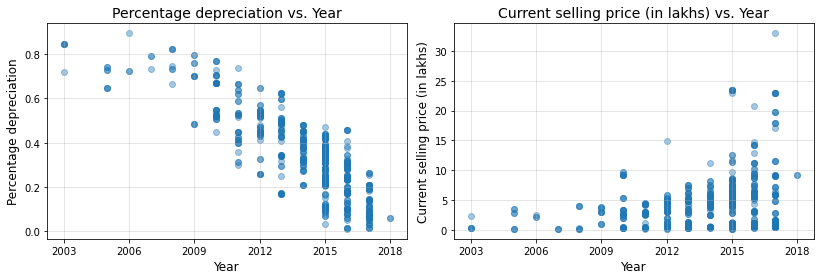

In [18]:
# your code here

x_colname = "Year"
x_label = "Year"
y_colnames = ["perc", "Current_Selling_Price"]
y_labels = [
    "Percentage depreciation", "Current selling price (in lakhs)"
]

perc_comparison_plot(df, x_colname, y_colnames, x_label, y_labels)

**INTERPRETATION:**

*your answer here*

Though the graphs look different, on taking a closer look we can see that they have the same underlying relationship. This graphs indicates that the older the car, the lower its selling price (as is indicated by the higher percentage depreciation for earlier years). Interestingly, the relationship between year and percentage depreciation represents a far more linear relationship than year and current selling price. Whereas current selling price can be any value of zero or greater, percentage depreciation is bound between 0 and 1 and is representative of the percentage change in selling price, which is something we'd expect to be strongly related to the age of the vehicle. These characteristics have led to this linear and negative change in relationship.

<div class='exercise-r'>  

**4.2.2** Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current_Selling_Price`?

</div>

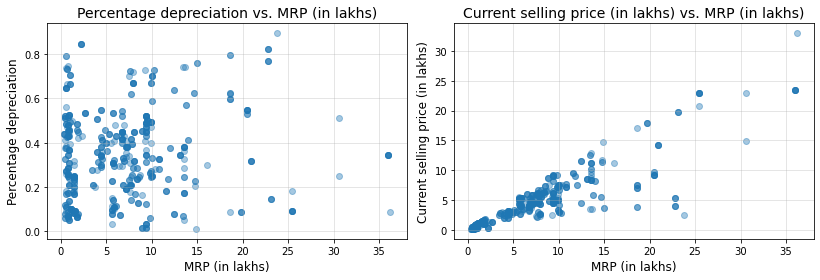

In [19]:
# your code here

x_colname = "MRP"
x_label = "MRP (in lakhs)"
y_colnames = ["perc", "Current_Selling_Price"]
y_labels = ["Percentage depreciation", "Current selling price (in lakhs)"]

perc_comparison_plot(df, x_colname, y_colnames, x_label, y_labels)

**INTERPRETATION:**

*your answer here*

The relationship between MRP and percentage depreciation is very different from MRP and current selling price. Previously, the relationship was more linear and strongly positive. Now, the relationship between `perc` and `MRP` is no longer linear and is not directional. This makes logical sense considering that for each value MRP, we will likely have cars of varying age and varying mileage (both things we would expect to be strongly related to percentage depreciation). For this reason, we would expect many varying values of percentage depreciation (across the entire range of 0 to 1) at each value MRP.

<div class='exercise-r'>  

**4.2.3** Does there seem to be a relationship between `Kms_Driven` and `perc`? 

</div>

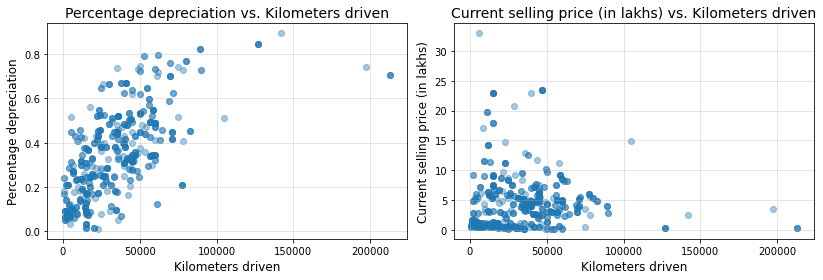

In [20]:
# your code here

x_colname = "Kms_Driven"
x_label = "Kilometers driven"
y_colnames = ["perc", "Current_Selling_Price"]
y_labels = ["Percentage depreciation", "Current selling price (in lakhs)"]

perc_comparison_plot(df, x_colname, y_colnames, x_label, y_labels)

**INTERPRETATION:**

*your answer here*

Yes. There appears to be a positive relationship between percentage depreciation and kilometers driven. This makes logical sense, because we would expect a vehicle to lose value the more that it has been driven. Therefore, the percentage depreciation increases as kilometers increase.

<div class='exercise-r'>  

**4.2.4** Which is the best predictor to predict `perc` (if there is one)? Is it the same as that of `Current_Selling_price` or has it changed? 

</div>

*your answer here*

It is difficult to tell from these plots which is definitivly the best. However, both year and kilometers driven appear to be good candidates. It is very possible that year will be the better of these two becuase it is slightly more linear in appearance and also exhibits less variation in spread across the full range of observed values. This has definitely changed from the best predictor of current selling price, which was MRP. But, now there appears to be very little relationship between percentage depreciation and MRP.

<div class='exercise-r'>  

**4.3** Fitting a Linear Regression model

Based on your EDA choose appropriate **predictor** variables for `perc` as your **response** variable. Use the same split train-test sets with training data of 75% and testing data of 25%.

- Fit a separate Linear Regression model for each of the predictors.
- Plot each linear model with the training and test data (in different colors with clear legends)
- Report the $MSE$ score from the training and test sets for each model.
- Find the best model (i.e. the best predictor) based on the $MSE$ of each model.

</div>

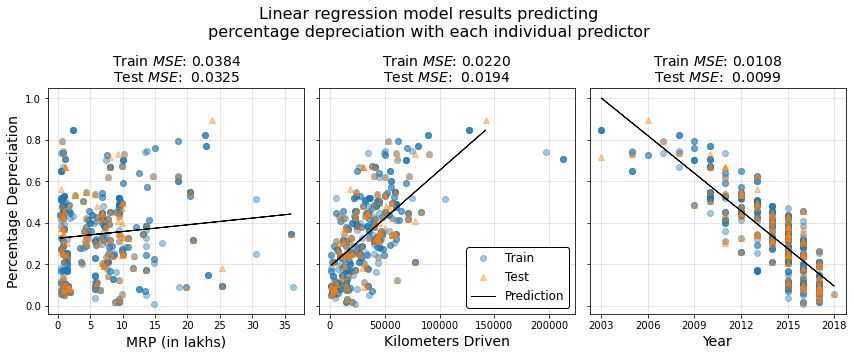

In [21]:
# your code here

# Here we will generate linear regression curves
# for each of our 3 predictors with perc as our response

predictor_list = ["MRP", "Kms_Driven", "Year"]
predictor_names = ["MRP (in lakhs)", "Kilometers Driven", "Year"]
response = "perc"

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12, 5))

fontsize = 14

plt.suptitle(
    "Linear regression model results predicting\n"
    "percentage depreciation with each individual predictor",
    fontsize=fontsize+2,
)

for i, (ax, predictor, pred_name) in enumerate(
    zip(axes, predictor_list, predictor_names)
):
    
    #Linear Regression using Year as the reponse variable
    X = df[predictor].values.reshape(-1, 1)
    y = df["perc"].values

    #Splitting the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=109)

    #Fitting a linear regression model
    linreg = LinearRegression().fit(X_train,y_train)

    #Predicting on the train and test sets
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Compute and report MSE
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    #Plot the curve
    ax.plot(X_train, y_train, "o", alpha=0.4, label="Train")
    ax.plot(X_test, y_test, "^", alpha=0.4, label="Test")
    ax.plot(X_test, y_test_pred, "k-", label="Prediction", linewidth=1)
    ax.set_title(
        f"Train $MSE$: {mse_train:.4f}\n"
        f"Test $MSE$:  {mse_test:.4f}",
        fontsize=14,
    )
    ax.set_xlabel(pred_name, fontsize=fontsize)
    ax.grid(":", alpha=0.4)

    if i==0:
        ax.set_ylabel("Percentage Depreciation", fontsize=fontsize)
    if i==1:
        ax.legend(edgecolor="k", framealpha=1, fontsize=fontsize-2, loc=4)
        
    if predictor=="Year":
        min_year = df[predictor].min()
        max_year = df[predictor].max()
        ax.set_xticks(np.arange(min_year, max_year+1, 3))


plt.tight_layout()
plt.show()

**INTERPRETATION:**

*your answer here*

For linear regression, year is the best predictor for percentage depreciation as is evidenced by that model having the lowest test $MSE$ of all three models shown above.

<div class='exercise-r'>  

**4.4** You have now established a good linear model for **response** `perc`. At the same time, you also know the relationship between `perc` and `Current_Selling_Price`, which is the **response** that we ultimately want to model. Combining the two pieces of knowledge, what linear model can you build to model `Current_Selling_Price` directly with the predictor that models `perc` the best? Build that model and inspect the $R^2$ score of the new model on `Current_Selling_Price`. Explain the approach you have chosen to take (be explicit in your description). Is the new model better than the model you had built in [Question 3](#part3questions)?

</div>

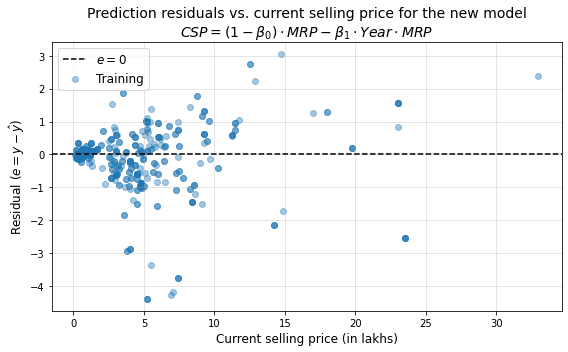

The R-squared for the new model described below is:

	Train	0.9557
	Test	0.9611


In [22]:
# your code here

# Linear Regression using Year as the predictor for perc

X = df["Year"].values
y = df["perc"].values

# Splitting the data into train and test sets

idx_train, idx_test = train_test_split(
    np.arange(X.shape[0]), test_size=0.25, random_state=109
)

# Fitting a linear regression model for `perc` with our train data
linreg = LinearRegression().fit(
    X[idx_train].reshape(-1,1),y[idx_train].reshape(-1,1)
)

# Now, predict the current selling price with the help of `prec`
df["csp_pred"] = df["MRP"]*(
    1 - linreg.predict(X.reshape(-1,1)).flatten()
)

# Calculating R^2 for the test set and the csp_predictions

cspvals_train = df["Current_Selling_Price"].values[idx_train]
csp_pred_vals_train = df["csp_pred"].values[idx_train]
trainval = r2_score(cspvals_train, csp_pred_vals_train)

cspvals_test = df["Current_Selling_Price"].values[idx_test]
csp_pred_vals_test = df["csp_pred"].values[idx_test]
testval = r2_score(cspvals_test, csp_pred_vals_test)

# Residual Plot
residuals = cspvals_train - csp_pred_vals_train

plt.figure(figsize=(8, 5))
plt.scatter(cspvals_train, residuals, alpha=0.4, label="Training")
plt.axhline(color="black",linestyle="dashed",  label="$e=0$")
plt.title(
    "Prediction residuals vs. current selling price for the new model\n"
    "$CSP = (1-\\beta_0) \cdot MRP - \\beta_1 \cdot Year \cdot MRP$", 
    fontsize=14,
)
plt.xlabel("Current selling price (in lakhs)", fontsize=12)
plt.ylabel("Residual ($e = y - \hat{y}$)", fontsize=12)
plt.grid(":", alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

print(
    "The R-squared for the new model described below is:\n\n"
    f"\tTrain\t{trainval:0.4f}\n"
    f"\tTest\t{testval:0.4f}"
)

**INTERPRETATION:**

*your answer here*

**Modeling Approach:** The previous linear regression model (from Question 3) was a linear relationship between CSP & MRP.

$$CSP = \beta_0 + \beta_1 \cdot MRP$$

That model did not perform as well (low test $R^2$) because we are missing non-linear interaction terms between Sales Price & Year.

However, the new "depreciation" model between year and % drop in price intelligently incorporates interaction terms between Maximum Retail Price and Year as shown below:

$$ \% Depreciation(q) = \dfrac{MRP - CSP}{MRP} = \beta_0 + \beta_1 \cdot Year$$

i.e $$CSP = (1-\beta_0) \cdot MRP - \beta_1 \cdot Year \cdot MRP$$


**Results:** As can be seen in our results above, the test $R^2$ is improved over the prior linear regression model from Question 3. Now, roughly 96% in the variability of current selling price is explained by our model, versus just 80.5% in Question 3. Additionally, we can see some improvement in our residuals plot for this newly specified model. While there are still signs of heteroskedasticity in our residuals, the overall vertical spread of those residuals has been reduced. This still presents cause for concern regarding our assumptions for linear regression, but less so than before.

<a id="part2"></a>
    
# PART 2 [40 pts]: Analysis of publically available profiles on SimplyMarry.com

[Return to contents](#contents)

<a id="part2intro"></a>

## Overview

[Return to contents](#contents)

In this part we analyze data from publically available [profiles on SimplyMarry.com](https://en.wikipedia.org/wiki/SimplyMarry), an Indian matrimonial matching portal that was closed in 2017. We will use this data to investigate relationships among various attributes reported in user profiles and examine trends embedded in this data that relate user-reported income.

### Dataset

The SimplyMarry.com data is aggregated in the file named `data/Income_prediction.csv`. All attributes in this dataset refer to traits and preferences of users looking for a spouse on SimplyMarry.com. The attributes that refer specifically to preferences, rather than traits, are clarified in the list below. 

- **age** - Age of person looking for a spouse
- **gender** - {'Female': 0, 'Male': 1} 
- **height** - Height in inches
- **bmi** - Body mass index (BMI) calculated based on height and weight
- **eating** - {'No Restrictions': 0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - Family living arrangement preference of the person looking for a spouse ('Doesn't Matter': 0, 'Other': 3, 'Nuclear': 1, 'Joint family': 2}
- **status** - Social status preference of the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Prefers Not To Respond': 0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ': 3, 'Wheatish Medium ': 4, 'Dark': 5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School': 0, 'Some college': 1, 'Undergrad': 2, 'Grad': 3, 'Doctorate': 4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi': 3, 'Kolkata': 4, 'Bengaluru': 5, 'Chennai': 6, 'Hyderabad': 7, 'Pune': 8, 'Ahmedabad': 9, 'Surat': 10, 'Vishakapatnam': 11, 'Others': 12)
- **income** - Annual income in dollars

**NOTE:** Within the **family_type** attribute, the 'Joint family' category denoted by a value of 2 comprises several more granular joint-family options not shown here. Those various types of joint family arrangements include 'Joint family both parents', 'Joint family only mother', 'Joint family father mother and brothers sisters', 'Joint family single parent brothers and or sisters', and 'Joint family only father', each of which has simply been aggregated under 'Joint family' in our dataset.

*Source: Harvard IACS*

### Disclaimer

This dataset is several years old and representative of profiles from a site that no longer exists. Some attributes represented in this dataset are particularly challenging to approach even with far more sophisticated analyses and nuanced considerations than we will be applying in this assignment. Extremely simple, reductive analysis on sensitive topics such as these can sometimes do more harm than good. For those reasons, please be cognizant not to draw pontentially harmful generalizations from any results or findings you generate below. We will be exploring ethics and the potential harms of biases and generalizations in data science in greater depth as we continue throughout this semester.

<a id="part5questions"></a>

## <div class='exercise'><b>Question 5: Investigating relationships of SimplyMarry.com reported attributes [25 pts]</b></div>

[Return to contents](#contents)

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

**5.7** Is income lower or higher for those living in "nuclear" families?

**5.8** What is the average effect of the "Manglik" variable on income?


## Question 5: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

First we are going to use simple analytics to learn more about the relationships of different attributes in this dataset. The idea is to use basic modeling based on averages and sample distributions to uncover potential relationships in the data.

Here we will answer the below questions using plots and simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate findings more clearly.

</div>

In [23]:
# your code here 

# Read our data into a dataframe
df = pd.read_csv("data/Income_prediction.csv")

# Inspect our dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12355 entries, 0 to 12354
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          12355 non-null  int64  
 1   gender       12355 non-null  int64  
 2   height       12355 non-null  int64  
 3   bmi          12355 non-null  float64
 4   eating       12355 non-null  int64  
 5   family_type  12355 non-null  int64  
 6   status       12355 non-null  int64  
 7   manglik      12355 non-null  int64  
 8   drinking     12355 non-null  int64  
 9   complexion   12355 non-null  int64  
 10  body         12355 non-null  int64  
 11  education    12355 non-null  int64  
 12  city         12355 non-null  int64  
 13  income       12355 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 1.3 MB


,age,gender,height,bmi,eating,family_type,status,manglik,drinking,complexion,body,education,city,income
0,25,1,62,20.161,4,2,1,0,1,2,1,0,12,2500
1,28,0,66,22.062,2,2,2,2,1,2,2,2,8,7500
2,31,1,68,19.107,2,1,1,1,1,2,2,2,8,7500
3,30,1,69,23.441,2,1,1,1,1,2,1,2,8,7500
4,34,0,63,22.651,4,1,1,0,1,2,2,2,10,4167


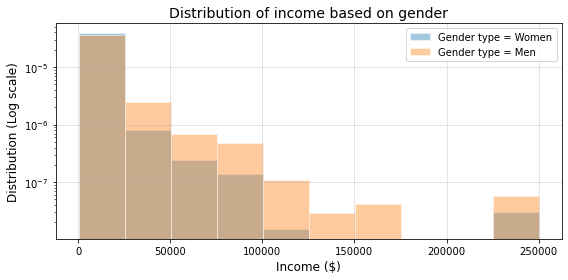

In [24]:
# your code here

gendermap = {0:"Women", 1:"Men"}

fig, ax = plt.subplots(1,1, figsize=(8,4))
for i in gendermap.keys():
    ax.hist(
        df[df.gender==i].income,
        log=True,
        label = f"Gender type = {gendermap[i]}",
        alpha=0.4,
        bins = 10,
        density=True,
        edgecolor="w",
    )
    ax.legend(loc="best")
    ax.set_xlabel("Income ($)", fontsize=12)
    ax.set_ylabel("Distribution (Log scale)", fontsize=12)

plt.title("Distribution of income based on gender", fontsize=14)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

**INTERPRETATION:**

*Your answer here*

Yes. As can be seen in the histogram above, there appears to be a disparity in income between men and women in the dataset. Higher income groups with annual income ranging from $\$100,000$ to $\$175,000$ comprise almost exclusively of men. There are more men than women in almost all income groups, except for the lowest income group.

**SOLUTION NOTE:** As can be seen in the plot above, we used `density=True` to convert our histogram from counts to density, in order to help us deal with any imbalance between male and female populations in our dataset. Doing so allows us to compare the density of the two groups on a common scale. Additionally, we have used log-scale on the $y$-axis, using the `log=True` argument, in order to make the relationship more clear for visual inspection. Without setting `log=True` for this plot, the shear size of the lowest income bin overwhelms the plot, making it impossible to discern differences across any of the other income levels. You can try setting this to `log=False` and rerunning this cell to see the difference.

<div class='exercise-r'>  

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? Is it possible to consider skin complexion as an ordinal variable? For instance, consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.

</div>

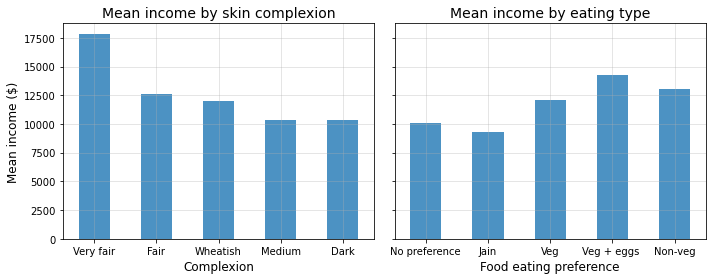

In [25]:
# your code here 
fig, axes = plt.subplots(1,2, sharey=True, figsize =(10,4))
df.groupby(["complexion"]).mean().income.plot(
    kind="bar", alpha=0.8, ax=axes[0]
)
axes[0].set_xlabel("Complexion", fontsize=12)
axes[0].set_title("Mean income by skin complexion", fontsize=14)
axes[0].set_xticklabels(
    ["Very fair","Fair","Wheatish","Medium","Dark"], rotation=0
)
plt.grid(":", alpha=0.4)

df.groupby(["eating"]).mean().income.plot(kind="bar", alpha=0.8, ax=axes[1])
axes[1].set_xticklabels(
    ["No preference","Jain","Veg","Veg + eggs ","Non-veg"], rotation=0
)
axes[1].set_xlabel("Food eating preference", fontsize=12)
axes[1].set_title("Mean income by eating type", fontsize=14)

for ax in axes:
    ax.set_ylabel("Mean income ($)", fontsize=12)
    ax.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()

**INTERPRETATION:**

*Your answer here*

There does appear to be a relationship between income and dietary preference. Users who eat "Veg + eggs" have the highest average income. Average annual income then decreases from "Non-veg", to "Veg", to those with "No preference", and finally to "Jain" users, who have the lowest mean income.

There also appears to be a clear relationship between reported income and skin complexion among users. Users with "Very fair" complexion have the highest mean income. Income then decreases as skin complexion decomes darker, with users who have "Medium" and "Dark" complexion reporting the lowest mean incomes. 

For both of these attributes, and for the skin complexion attribute in particular, these are examples of the sorts of results we might see where social and structural societal biases affect the earning potential for particular groups of users in our dataset.

Whether or not we should treat the `complexion` attribute as an ordinal variable will likely depend on the type of analysis we are conducting, as well as the types of research questions we hope to answer with this data. Because there is a gradation inherent to complexion, which can be perceived or observed from lightest to darkest, this is a variable that does lend itself to being treated as an ordinal variable. Such ordering could be important to identifying trends or biases that affect the users of SimplyMarry.com, such as those stemming from social or structural biases.

Note that, as data scientists, these are things of which we must always be aware. This becomes particularly important in the attributes that we choose to include in predictive models, as well as the the care that we take in interpreting any output from our predictive models. As we will show later in this semester, ommitting a particular variable such as `complexion` from a predictive model is typically NOT enough to avoid potentially harmful bias in our model predictions or the decisions made based on such models. Many attributes, including even seemingly innocuous ones, are typically imbdued with the social and structural biases that permeate societies in which data are generated, ultimately biasing our results even when we explicitly ommit sensitive attributes such as race or gender.

<div class='exercise-r'>  

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

</div>

In [26]:
# your code here

# Here we define a plotting function for reuse in Questions 
# 5.3, 5.5, and 5.7 to compare mean and median income against
# various categorical variables

def plot_mean_median_income(
    df,
    var_name,
    var_cats,
    var_label,
    suptitle,
    ax3_plot_func=None,
    **kwargs
):
    """Generates mean vs. median income plots along with 3rd plot
    
    :param df: pd.DataFrame, data for plotting
    :param var_name: str, name of variable of interest column in df
    :param var_cats: list, category names corresponding with the variable
    :param var_label: str, variable name as it will appear in labels
    :param suptitle: str, overarching title for this set of subplots
    :param ax3_plot_func: func, for plotting arbitrary 3rd plot on
                          the 3rd axis. Plot must include a df and ax
                          argument for passing df and the actual axis
                          object.
    :param kwargs: any additional arguments will be passed to the
                   ax2_plot_func when called within this function
    
    .. note:: to learn more about using **kwargs, please see: 
              https://realpython.com/python-kwargs-and-args/
    """
    
    # This plot will present as an irregular grid of subplots
    # For this purpose, we will use add_gridspec and add_subplot
    # to define the specific layout for our grid
    fig = plt.figure(constrained_layout=False, figsize=(11, 7))
    spec = fig.add_gridspec(2, 2)

    # ax1 and ax2 are oriented horizontally along our top row
    # and ax3 takes up the entire second horizontal row of our plot
    ax1 = fig.add_subplot(spec[0, 0])
    ax2 = fig.add_subplot(spec[0, 1])
    ax3 = fig.add_subplot(spec[1, :])

    # Define an overarching title for our plot
    plt.suptitle(
        suptitle,
        fontsize=18,
        y=1,
    )

    # Generate our ax1 plot displaying mean values
    df.groupby([var_name]).mean().income.plot(
        kind="bar", alpha=0.8, ax=ax1
    )
    ax1.set_ylabel("Mean income ($)", fontsize=12)
    ax1.set_xlabel(None)
    ax1.set_title(f"MEAN income by {var_label}", fontsize=14)
    ax1.set_xticklabels(
        var_cats, horizontalalignment="right", rotation=45
    )
    ax1.grid(":", alpha=0.4)

    # Generate our ax2 plot displaying median values
    df.groupby([var_name]).median().income.plot(
        kind="bar", alpha=0.8, ax=ax2
    )
    ax2.set_ylabel("Median income ($)", fontsize=12)
    ax2.set_xlabel(None)
    ax2.set_title(f"MEDIAN income by {var_label}", fontsize=14)
    ax2.set_xticklabels(
        var_cats, horizontalalignment="right", rotation=45
    )
    ax2.grid(":", alpha=0.4)

    # Generate our ax3 plot using an arbitrary plotting function
    # that we will need to define and then pass to
    # plot_mean_median_income. This allows us to more widely vary
    # the design of our ax3 plot for each question 5.3, 5.5, and 5.7.
    # NOTE that we pass our ax3 axis object to this subplot function.
    if ax3_plot_func is not None:
        ax3_plot_func(df=df, ax=ax3, **kwargs)

    plt.tight_layout()
    plt.show()

In [27]:
# your code here

# Now we define the first of our ax3 plots for use with our
# plot_mean_median_income function. This one is designed specifically
# for question 5.3

def plot_income_hist(df, ax):
    """Generates income histogram for use with plot_mean_median_income ax3
    
    :param df: pd.DataFrame, data for plotting
    :param ax: matplotlib axis object
    """
    ax.hist(
        df["income"],
        bins=40,
        alpha=0.8,
        density=True,
        log=False,
        label="Observations",
        histtype="bar",
        edgecolor="w",
    )
    ax.set_xlabel("Income ($)", fontsize=12)
    ax.set_ylabel("Distribution (normalized)", fontsize=12)
    ax.set_title(
        "Distribution of reported annual income for ALL users",
        fontsize=14,
    )
    ax.set_xlim(df["income"].min())
    ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1e4))
    ax.grid(":", alpha=0.4)

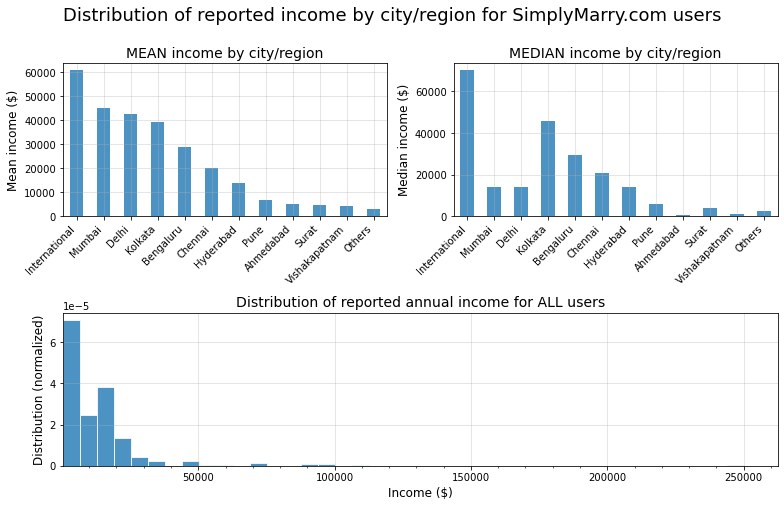

In [28]:
# your code here

# Now we set our arguments and generate our plot
# for question 5.3

var_name = "city"
var_label = "city/region"
suptitle = (
    f"Distribution of reported income by {var_label}"
    " for SimplyMarry.com users"
)
var_cats = [
    "International",
    "Mumbai",
    "Delhi",
    "Kolkata",
    "Bengaluru",
    "Chennai",
    "Hyderabad",
    "Pune",
    "Ahmedabad",
    "Surat",
    "Vishakapatnam",
    "Others",
]

plot_mean_median_income(
    df=df,
    var_name=var_name,
    var_cats=var_cats,
    var_label=var_label,
    suptitle=suptitle,
    ax3_plot_func=plot_income_hist,
)

**INTERPRETATION:**

*Your answer here*

In the distribution of reported annual income shown in the histogram above, we observe that most of the population have income below \\$20,000, a small part of population earn \\$20,000 to approximately \\$40,000, and very few people earn above \\$40,000. However, in the mean income by region barplot, we observe users from international, Mumbai, Delhi, and Kolkata have mean incomes of approximately \\$60,000, \\$45,000, \\$43,000, \\$40,000 respectively, which are extremely high compared to the entire population. This could lead us to conclude that either the overall levels of income in these regions are on a whole higher than the others, or that these are the regions where extreme outliers in our data (at extremely high levels of income) are inflating mean income levels. By re-plotting this data based on MEDIAN instead of mean (as we do in the subplot to the upper-right), we can see that for Mumbai and Dehli, this was the case. 

**PLEASE NOTE:** Often when analyzing variables such income that have exteme outliers skewing the data, median can be a useful metric because it is not affected by outliers in the same manner as mean. This is illustrated above and in the solutions to questions 5.5 and 5.7 below. In all three cases, we can see that by selecting either "mean" OR "median" changes the final conclusions that we draw from the data.

<div class='exercise-r'>  

**5.4** Is there a clear trend between BMI and income?

</div>

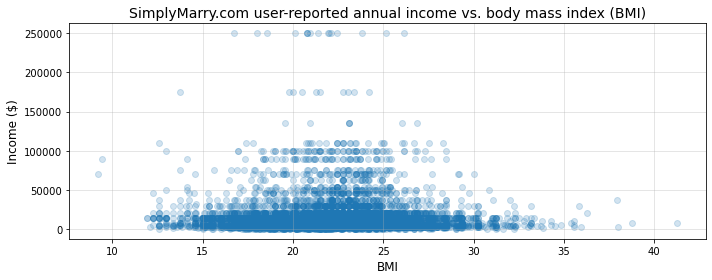

In [29]:
# your code here
fig, ax = plt.subplots(1,1, figsize =(10,4))
plt.scatter(df.bmi, df.income, alpha=0.2)
plt.title(
    "SimplyMarry.com user-reported annual income vs. "
    "body mass index (BMI)",
    fontsize=14,
)
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Income ($)", fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

**INTERPRETATION:**

*Your answer here*

Yes, there is a trend between BMI and income. However, that relationship appears to be fairly weak and non-linear. Almost all of our high-income outliers are located between BMI values of 15-30. High-income observations are largely non-existent at BMI levels over 30 in our dataset.

This leads to a number of important questions about the underlying trends or potential biases affecting these results. Such as, do high income earners have greater access to resources that affect their BMI? Or, might societal biases be affecting the earning potential of users based on their BMI? Or, is there possibly also a correlation among users exaggerating their level of income and also under-reporting their BMI on the SimplyMarry.com platform?

<div class='exercise-r'>  

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the gender variable available in this dataset?

</div>

In [30]:
# your code here

# We will use our plot_mean_median_income plotting function
# again here. Therefore, we will fist define a plotting function
# to generate the subplot for our 3rd axis (i.e. ax3)

def plot_income_ed_gender(df, ax, categories):
    """Generates income by ed and gender barplot for use 
    with plot_mean_median_income ax3

    :param df: pd.DataFrame, data for plotting
    :param ax: matplotlib axis object
    :param categories: list, category names for variable of interest
    """
    ax = sns.stripplot(
        x=df["education"],
        y=df["income"],
        hue=df["gender"],
        jitter=0.45,
        dodge=True,
        size=7,
        linewidth=1,
        alpha=0.2,
    )
    ax.set_xticklabels(
        categories,
        horizontalalignment="center",
        rotation=0,
    )
    plt.legend(["women","men"], fontsize=12, loc="upper left")
    ax.set_xlabel(None)
    ax.set_ylabel("Income ($)", fontsize=12)
    ax.set_title(
        "Distribution of income observations by level of "
        "education, men vs. women",
        fontsize=14,
    )
    ax.grid(":", alpha=0.4)

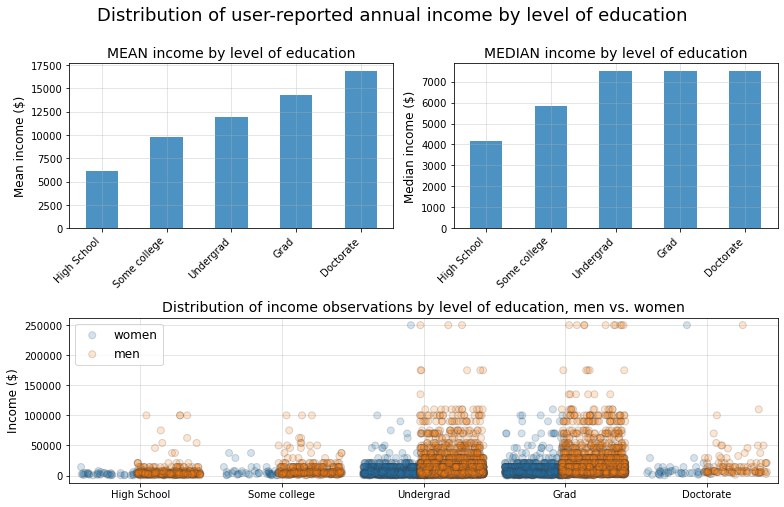

Median Income by Education Level:

High School             $4,167
Some college            $5,833
Undergrad               $7,500
Grad                    $7,500
Doctorate               $7,500



In [31]:
# your code here

# Now we set our arguments and generate our plot
# for question 5.5

var_name = "education"
var_label = "level of education"
suptitle = (
    f"Distribution of user-reported annual income by {var_label}"
)
var_cats = [
    "High School", "Some college", "Undergrad", "Grad", "Doctorate"
]

plot_mean_median_income(
    df=df,
    var_name=var_name,
    var_cats=var_cats,
    var_label=var_label,
    suptitle=suptitle,
    ax3_plot_func=plot_income_ed_gender,
    categories=var_cats,
)

# And, we will print our median income values so we can inspect them
# more closely.

income_ed_med = df.groupby(["education"]).median().income.values

print(
    "Median Income by Education Level:\n"
)

for cat, value in zip(var_cats, income_ed_med):
    print(f"{cat:<20}{'$':>5}{value:,.0f}")
print()

**INTERPRETATION:**

*Your answer here*

The level of education shows a clear trend with income, as groups with higher education levels have higher average income. However, similar to what we saw in our analysis of region vs. income, we can see that by using mean, our results are heavily influenced by high-income outliers. This is particularly true for the "Doctorate" group. By replotting our results using MEDIAN instead of mean, we can see that all three of the highest levels of eduction (i.e. "Undergrad", "Grad", and "Doctorate") have identical median income levels. This effect of high-income outliers is further illustrated in the jitter-plot, which shows us each individual data point by education category, for both men and women.

The same overall education vs. income trend is exhibited for both men and women, as can be seen in the jitter-plot. However, as we had seen in our results for Question 5.1, there is a clear disparity in income levels between men and women in income, where, on average, women are shown to make significantly less across all educations levels shown here.

<div class='exercise-r'>  

**5.6** Do any of the quantitative attributes show a clear linear or non-linear association with income?

</div>

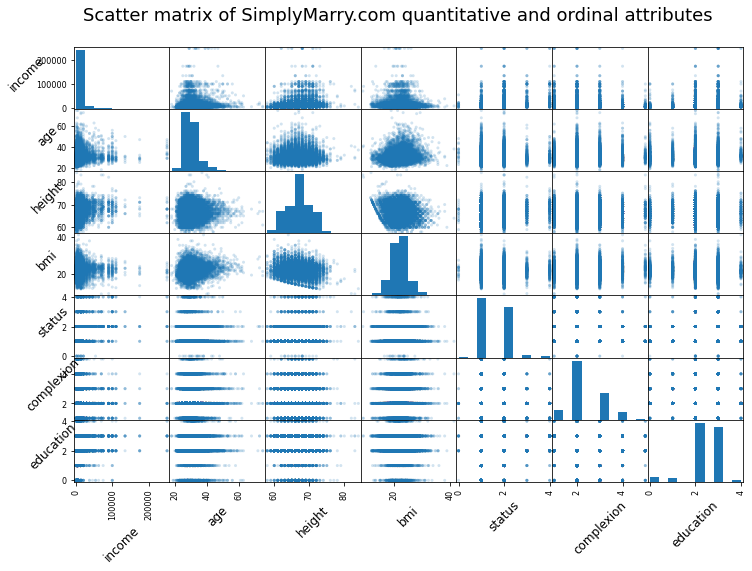

In [32]:
# your code here

attr_list = [
    "income",
    "age",
    "height",
    "bmi",
    "status",
    "complexion",
    "education",
]

scatter = pd.plotting.scatter_matrix(
    df[attr_list], alpha=0.2, figsize=(12,8)
)
for ax in scatter.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45, fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45, fontsize=12)
plt.suptitle(
    "Scatter matrix of SimplyMarry.com quantitative and ordinal attributes",
    fontsize=18,
    y=0.95,
)
plt.show()

**INTERPRETATION:**

*Your answer here*

There is no clear linear relationship between any variables and `income`. 

For the `age` variable, it appears that people with younger ages have reported higher income in general. For the `height` variable, it appears that people with medium height have reported higher income in general. And, for the `bmi` variable, as we have also shown above in Questoin 5.4, it appears that people with mid-level BMIs have reported higher income in general.

Once again, all of these relationship do raise interesting questions about our data, and how much these particular trends are attributable to "actual" relationships between income and other traits in our user population versus users knowingly misrepresenting income, age, height, and BMI when reporting these values on their user-profiles.

<div class='exercise-r'>  

**5.7** Is income lower or higher for those living in "nuclear" families?

</div>

In [33]:
# your code here

# We will use our plot_mean_median_income plotting function
# again here. Therefore, we will fist define a plotting function
# to generate the subplot for our 3rd axis (i.e. ax3)

def plot_income_family_type(df, ax, categories):
    """Generates income by family type barplot for use 
    with plot_mean_median_income ax3
    
    :param df: pd.DataFrame, data for plotting
    :param ax: matplotlib axis object
    :param categories: list, category names for family type
    """
    ax = sns.stripplot(
        x=df["family_type"],
        y=df["income"],
        jitter=0.45,
        dodge=True,
        size=7,
        linewidth=1,
        alpha=0.2,
        color="tab:blue",
    )
    ax.set_xticklabels(categories, rotation=0)
    ax.set_xlabel(None, fontsize=12)
    ax.set_ylabel("Income ($)", fontsize=12)
    ax.set_title(
        "Income observations by family type preference",
        fontsize=14,
    )
    ax.grid(":", alpha=0.4)    

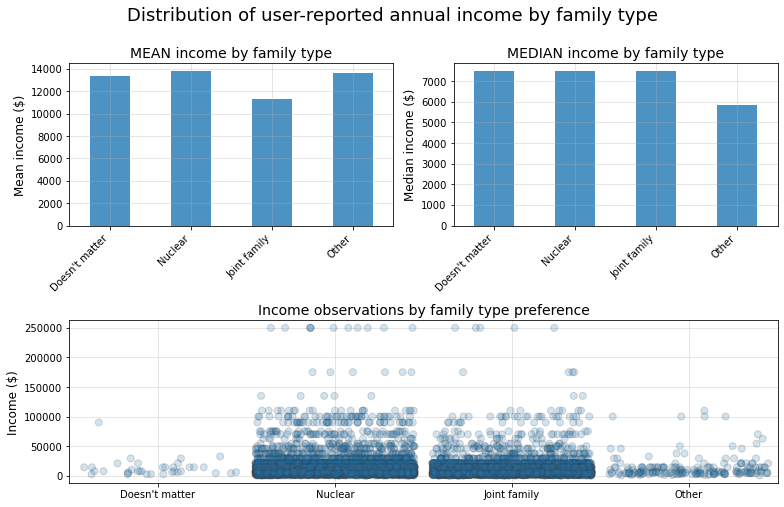

In [34]:
# your code here

# Now we set our arguments and generate our plot
# for question 5.7

var_name = "family_type"
var_label = "family type"
suptitle = (
    f"Distribution of user-reported annual income by {var_label}"
)
var_cats = [
    "Doesn't matter", "Nuclear", "Joint family", "Other"
]

plot_mean_median_income(
    df=df,
    var_name=var_name,
    var_cats=var_cats,
    var_label=var_label,
    suptitle=suptitle,
    ax3_plot_func=plot_income_family_type,
    categories=var_cats,
)


**INTERPRETATION:**

*Your answer here*

Users who are living in (or more accurately, "prefer" living in) "Nuclear" familiies have slightly higher mean income, but not much higher than "Doesn't matter" or "Other", whereas "Joint" family appears to be lowest on average. However, once again, as we have seen in questions 5.3 and 5.5, our conclusions change if we look at each of these categories based on median income. "Nuclear" family median income is identical to "Doesn't Matter" and "Joint" respondents, whereas "Other" is now shown to be lowest. Once again, if we plot these actual data points using a jitter-plot, we can see that this effect is due to income outliers in each category.

<div class='exercise-r'>  

**5.8** What is the average effect of the "Manglik" variable on income?

</div>

In [35]:
# your code here

man_df = df[df["manglik"]!=2]

x = man_df[["manglik"]]
y = man_df["income"]
model = LinearRegression()
man_model = model.fit(x,y)

coef = man_model.coef_[0]

print(
    f"Manglik respondents, on average, earn ${np.abs(coef):,.2f} "
    f"{'more' if coef>0 else 'less'} per year compared those who "
    "are not manglik."
)

Manglik respondents, on average, earn $1,169.36 less per year compared those who are not manglik.


**INTERPRETATION:**

*Your answer here*

Here we have fit a simple linear regression with "Manglik" as our predictor and income as or response variable. By examining our resulting coefficient, we can see the average effect of Manglik status on the reported incomes in our SimplyMarry.com dataset. Please see our printed output above for the result.

<a id="part6questions"></a>

## <div class='exercise'><b>Question 6:  Calculate the Gini coefficient [15 pts]</b></div>

[Return to contents](#contents)


**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

## Question 6: Solutions 

[Return to contents](#contents)

<div class='exercise-r'>  

**Gini coefficients are often used to quantify income inequality.** For an introductory overview of the Gini coefficient, its derivation, and its uses, feel free to [read more about it here](https://en.wikipedia.org/wiki/Gini_coefficient). That article also provides [a useful graphical representation](https://en.wikipedia.org/wiki/File:Economics_Gini_coefficient2.svg) of the Gini coefficient to better understand how it measures inequality. 

The Gini coefficient is defined by the formula:

$$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini coefficient of $G=0$ implies perfect income equality, whereas a Gini coefficient close to $G=1$ implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate and report the Gini coefficient for the income of the participants in our SimplyMarry.com dataset.

- **NOTE:** For algorithmic simplicity and consistency, you can rank income values for all observations, keeping duplicate values in your sorted array. Therefore, you will likely have sorted income values $x_i$ similar to `[417, 417, 417, ..., 250000, 250000, 250000]` with corresponding rank indices $i$ similar to `[1, 2, 3, ..., 12353, 12354, 12355]`. Nothing more sophisticated than that is required for dealing with ties (i.e. duplicates) in your sorted income values for Question 6.1.

</div>

In [36]:
# your code here

def gini(array, verbose=False):
    """Calculate the Gini coefficient of a numpy array
    
    :param array: np.array, 1D array of income values
    :return: float, gini coefficient value
    
    .. note::
    
       - Based on bottom equation here:
         - http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
       - ...from:
         - http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
       - All values are sorted and treated equally.
    """
    array = array.flatten().astype("float64")
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    
    if verbose:
        # Printed sort array and indices for illustrative purposes only
        # These print statements are not required, but are provided
        # for clarity when referring to this implementation.
        print(f"Ranked income values in ascending order: {array}\n")
        print(f"Corresponding rank indices: {index}\n")
    
    # Return gini coefficient
    return (
        (np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))
    )


In [37]:
# your code here

# Calculate gini with verbose True to illustrate sorting approach
gini_coef = gini(df["income"].values, verbose=True)

# Print resulting Gini coefficient
print(
    f"The Gini Index for this dataset is {gini_coef:.3f}")

Ranked income values in ascending order: [   417.0000001    417.0000001    417.0000001 ... 250000.0000001
 250000.0000001 250000.0000001]

Corresponding rank indices: [    1     2     3 ... 12353 12354 12355]

The Gini Index for this dataset is 0.497


<div class='exercise-r'>  

**6.2** Compare your Gini coefficient with Gini benchmark countries:

- According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the country with the largest Gini coefficient is South Africa, ranked 1st at $0.63$, while the lowest is Ukraine, ranked 159th at $0.25$. India (i.e. SimplyMarry.com's primary user base) is ranked 95th on the list and has a Gini index of $0.357$.


- Based on your calculated Gini coefficient value for this dataset, what is your conclusion on the relationship of the income disparity of SimplyMarry.com's user base compared to the three countries listed above?


- Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?

</div>

**INTERPRETATION:**

*Your answer here*

Based on the Gini coefficient, the income inequality among users of the SimplyMarry.com user-base (0.497) is lower than that of the entire South African population (0.63), larger than that of the entire Ukrainian population (0.25), and larger than that of the entire Indian population (0.357). If the users of SimplyMarry.com were to be ranked according to the World Bank list of national Gini coefficients to which we have linked in the question text, SimplyMarry.com would be ranked 16th, just after Panama (0.499).

These results are particularly interesting, because the income inequality exhibited is so much higher than that of the Indian population as a whole (which was ranked 95th among all countries).

Then again, the self-reported nature of income in our SimplyMarry.com dataset, and the incentives that users seeking a partner might have to exaggerate their earnings, could definitely be contributing to this higher value Gini coefficient. Additionally, there is a selection bias in terms of users who have chosen to create SimplyMarry.com profiles, and there are also a number of "international" users on SimplyMarry.com, meaning that this website's user-base is likely NOT a representative sample of the Indian population as whole.

<a id="part7questions"></a>

### <div class='exercise'><b>Question 7 (required for 209a students, optional for others): Multi-linear regression [10 pts]</b></div>

[Return to contents](#contents)

Now we increase the scope of our analysis to solve another problem that is related to income of our SimplyMarry.com users.


![](data/modi.png)

*Image Source: [The Economic Times](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms)*

### Problem Description

Owing to a large number of people underreporting their income to evade taxes, as [reported by The Economic Times in 2017](https://economictimes.indiatimes.com/news/politics-and-nation/you-can-run-but-cant-hide-modis-long-arm-reaches-out-for-tax-evaders/articleshow/62293002.cms), the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on information commonly available on SimplyMarry.com.

This will help the department flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given SimplyMarry.com dataset, using both the categorical and quantitative predictors available in this dataset.

As with all other homework problems, this is a learning exercise. And, as absurd or problematic as it might seem to use SimplyMarry.com data for this purpose, in the real world, it will be your decision to choose the types of data science projects on which you will work as well as the clients with which you will work. 

### Deliverables

To accomplish this task, we will fit a multiple linear regression model to the training set.

Use the `sklearn` library. Your code should be contained in a Jupyter notebook cell.  An appropriate level of code comments are necessary.  Your code should run and output the required outputs described below.

### Required Outputs

- Fit a multiple linear regression model on the training set and predict on the train and test sets.
- Report the $MSE$ for the train and test set.
- Report the $R^2$ score on the test set.
- Make a plot of residuals vs. log of predicted values $\hat{y}$, with residuals on the $y$-axis and predicted values on the $x$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $y$-axis.
- Plot a histogram of the residuals values.
- Be certain to provide a written interpretation of your findings and any important aspects of your modeling approach of which you'd want the teaching staff to be aware, particularly if you attempt any optional outputs as mentioned below.

### Optional Outputs

You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:

- Polynomial terms for continous variables,
- Interaction terms between variables,
- Feature selection among given predictors.


## Question 7: Solutions 

[Return to contents](#contents)

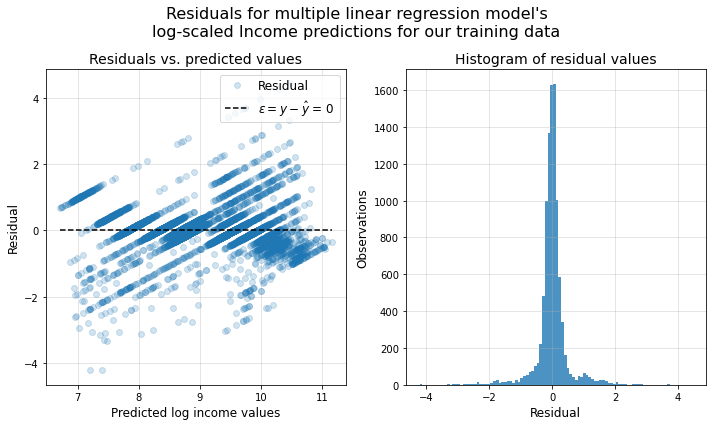

The train mse value is 0.251 and the test value is 0.235 
The train R squared value is 0.717 and the test value is 0.716 


In [38]:
# your code here

# Indentify our categorical vs. continuous quant variables
cat_vars = []
for col in df.columns.to_list():
#    if (len(df[col].unique()) > 2) and (len(df[col].unique()) < 10):
    if (len(df[col].unique()) < 15):
        cat_vars.append(col)
cont_vars = ["age", "height", "bmi"]

# Creating a mask for managing our train/test split
mask = np.ones(len(df))
itrain, itest = train_test_split(
    range(len(df)), train_size=0.8, random_state=109
)
mask[itest] = 0
mask = mask==1

# Define function for preprocessing our data
def logprepros(df, mask, cat, cont):
    """Preprocesses our SimplyMarry.com data for modeling income
    
    This function (1) splits our data into train-test splits,
    (2) one-hot-encodes our categorical variables, (3) standardizes
    our quantitative variables based on our training data mean and std,
    and (4) converts our response variable "income" to log-scale for
    improved linear model results, and (5) returns our resulting train
    test splits.
    
    :param df: pd.DataFrame, containing the SimplyMarry.com dataset
    :param mask: array, 1 and 0 values of len n for our data used
                 to identify the train-test split for our data 
    :param cat: list, categorical variable colnames
    :param cont: list, quantitative variable colnames
    :return: tuple of 4 numpy arrays for X train, X test, y train, 
             and y test 
    """
    dftrain = df[mask]
    dftest = df[~mask]
    
    one_hotdf = pd.get_dummies(
        df[cat], columns=cat, drop_first=True
    )
    onehot_train = one_hotdf[mask]
    onehot_test = one_hotdf[~mask]
    
    standard_train = pd.DataFrame()
    standard_test = pd.DataFrame()
    
    for var in cont:
    
        standard_train[var] = (
            dftrain[var] - dftrain[var].mean()
        )/dftrain[var].std()
        
        standard_test[var] = (
            dftest[var] - dftrain[var].mean()
        )/dftrain[var].std()
    
    Xtrain = standard_train.join(onehot_train).values
    Xtest = standard_test.join(onehot_test).values
    ytrain = np.log(dftrain.income)
    ytest = np.log(dftest.income)

    return Xtrain,Xtest,ytrain, ytest

# Preprocess our data
X_train, X_test, y_train, y_test = logprepros(
    df, mask, cat_vars, cont_vars
)

# Instantiate our model object and fit our model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Calculate our MSE and R^2 results

# Train results
trainmse = mean_squared_error(y_train, linreg.predict(X_train))
trainval = r2_score(y_train, linreg.predict(X_train))

# Test results
testmse = mean_squared_error(y_test, linreg.predict(X_test))
testval = r2_score(y_test,linreg.predict(X_test))

# Plot our residuals as a function of our predicted train values

yp = linreg.predict(X_train)
yp = np.array([i if i>0 else 0 for i in yp])
y = y_train

fig, ax = plt.subplots(1,2,figsize = (10, 6))
fig.suptitle(
    "Residuals for multiple linear regression model's\n"
    "log-scaled Income predictions for our training data",
    fontsize=16,
)

ax[0].plot(yp, yp - y, "o", alpha=0.2, label="Residual")
ax[0].plot(
    [yp.min(), yp.max()],
    [0,0],
    "k--",
    label="${\epsilon} = y - \hat{y}$ = 0"
)
ax[0].set_xlabel("Predicted log income values", fontsize=12)
ax[0].set_ylabel("Residual", fontsize=12)
ax[0].legend(loc="upper right", fontsize=12)
ax[0].set_title("Residuals vs. predicted values", fontsize=14)

ax[1].set_title("Histogram of residual values", fontsize=14)
ax[1].hist(yp - y, alpha=0.8, bins=100)
ax[1].set_xlabel("Residual", fontsize=12)
ax[1].set_ylabel("Observations", fontsize=12)
# Uncomment for detailed view of histogram
# ax[1].set_xlim([-1,1])

for a in ax:
    a.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()

# Print our MSE and R^2 results
print(
    f"The train mse value is {trainmse:.3f} and "
    f"the test value is {testmse:.3f} "
)
print(
    f"The train R squared value is {trainval:.3f} and "
    f"the test value is {testval:.3f} "
)

**INTERPRETATION:**

*Your answer here*

- **Modeling Approach:**
  - In our model above, we use all available predictors in our dataset to predict income.
  - Prior to generating our model, we one-hot-encode our categorical variables, and to improve our modeling results, we standardize our quantitative predictor variables to overcome the vast differences in scale among our different predictors, effectively converting all variables to a common scale.
  - In addition, to help counteract the outliers in our response observations for income, we convert our response variable to log-scale prior to fitting our model. This improves our linear model results and helps to ensure our linearity assumptions are better met.
- **Residuals Analysis:** By examining our histogram above, the residuals of our model appear to have a bell-shaped (i.e. roughly Normal-shaped) distribution, which is a characteristic of random noise. There is also no discernable trend in the scatter plot of residuals. Both of these are favorable characteristics when assessing whether we have met the basic assumptions required for linear regression.
- **Final Results:** The $R^2$ of the model is quite high at 0.716. This tells us that 71.6% of the variability in log-scaled income (i.e. our response variable) for our testing data is explained by our model. Note that the performance on our test set is also similar to the performance on the training set, indicating a low likelihood that we have overfit on our training data.

**THE END**                                                                                                